In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv('data.csv')  
df.drop(columns=['index', 'datehour', 'datemonth'], inplace=True, errors='ignore')

df['Date_Heure'] = pd.to_datetime(df['Date_Heure'], format='%m/%d/%Y %H:%M')

df['hour'] = df['Date_Heure'].dt.hour
df['day'] = df['Date_Heure'].dt.day
df['month'] = df['Date_Heure'].dt.month

In [18]:
features = ['Pression au niveau mer', 'Variation de pression en 3 heures',
            'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn',
            'Temperature', 'Point de rosee', 'Humidite', 'Visibilite horizontale',
            'Pression station', 'hour', 'day', 'month']
target = 'consommation'

In [19]:
print("Valeurs manquantes par colonne:")
print(df.isnull().sum())


Valeurs manquantes par colonne:
Date_Heure                                       0
Pression au niveau mer                           5
Variation de pression en 3 heures               15
Type de tendance barometrique                   15
Direction du vent moyen 10 mn                    1
Vitesse du vent moyen 10 mn                      1
Temperature                                      4
Point de rosee                                   4
Humidite                                         4
Visibilite horizontale                          14
Temps present                                 2285
Pression station                                 3
Rafales sur une periode                       2237
Periode de mesure de la rafale                2231
Precipitations dans la derniere heure         1593
Precipitations dans les 3 dernieres heures      61
Temperature (C)                                  4
consommation                                     0
hour                                             0

In [20]:
for col in df.columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)




C:\Users\hp\AppData\Local\Temp\ipykernel_5328\2498408961.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [21]:
print("Valeurs manquantes par colonne:")
print(df.isnull().sum())


Valeurs manquantes par colonne:
Date_Heure                                    0
Pression au niveau mer                        0
Variation de pression en 3 heures             0
Type de tendance barometrique                 0
Direction du vent moyen 10 mn                 0
Vitesse du vent moyen 10 mn                   0
Temperature                                   0
Point de rosee                                0
Humidite                                      0
Visibilite horizontale                        0
Temps present                                 0
Pression station                              0
Rafales sur une periode                       0
Periode de mesure de la rafale                0
Precipitations dans la derniere heure         0
Precipitations dans les 3 dernieres heures    0
Temperature (C)                               0
consommation                                  0
hour                                          0
day                                           0
month   

In [22]:
X = df[features]
y = df[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

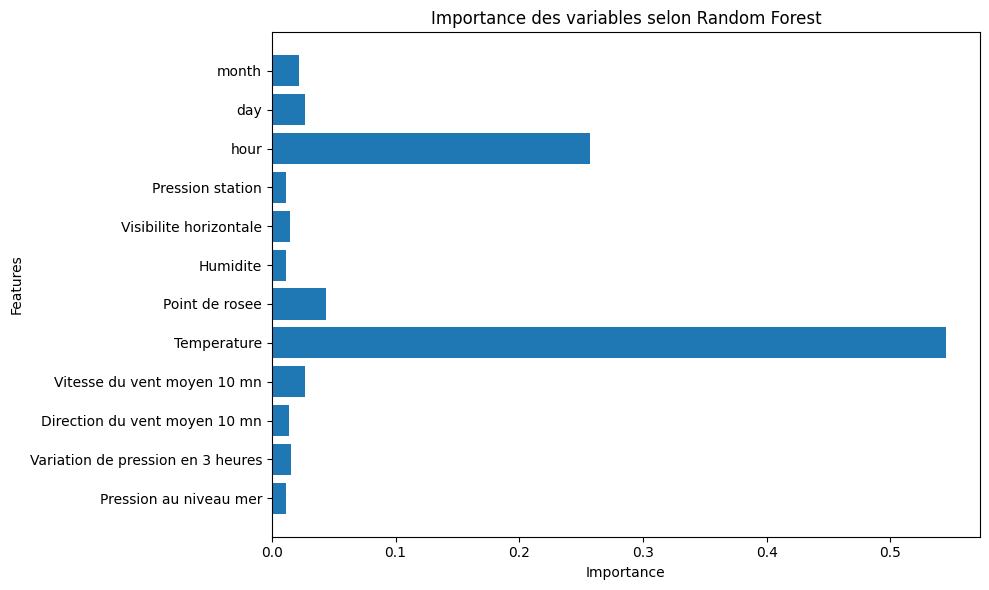

In [31]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Importance des variables selon Random Forest")
plt.tight_layout()
plt.show()

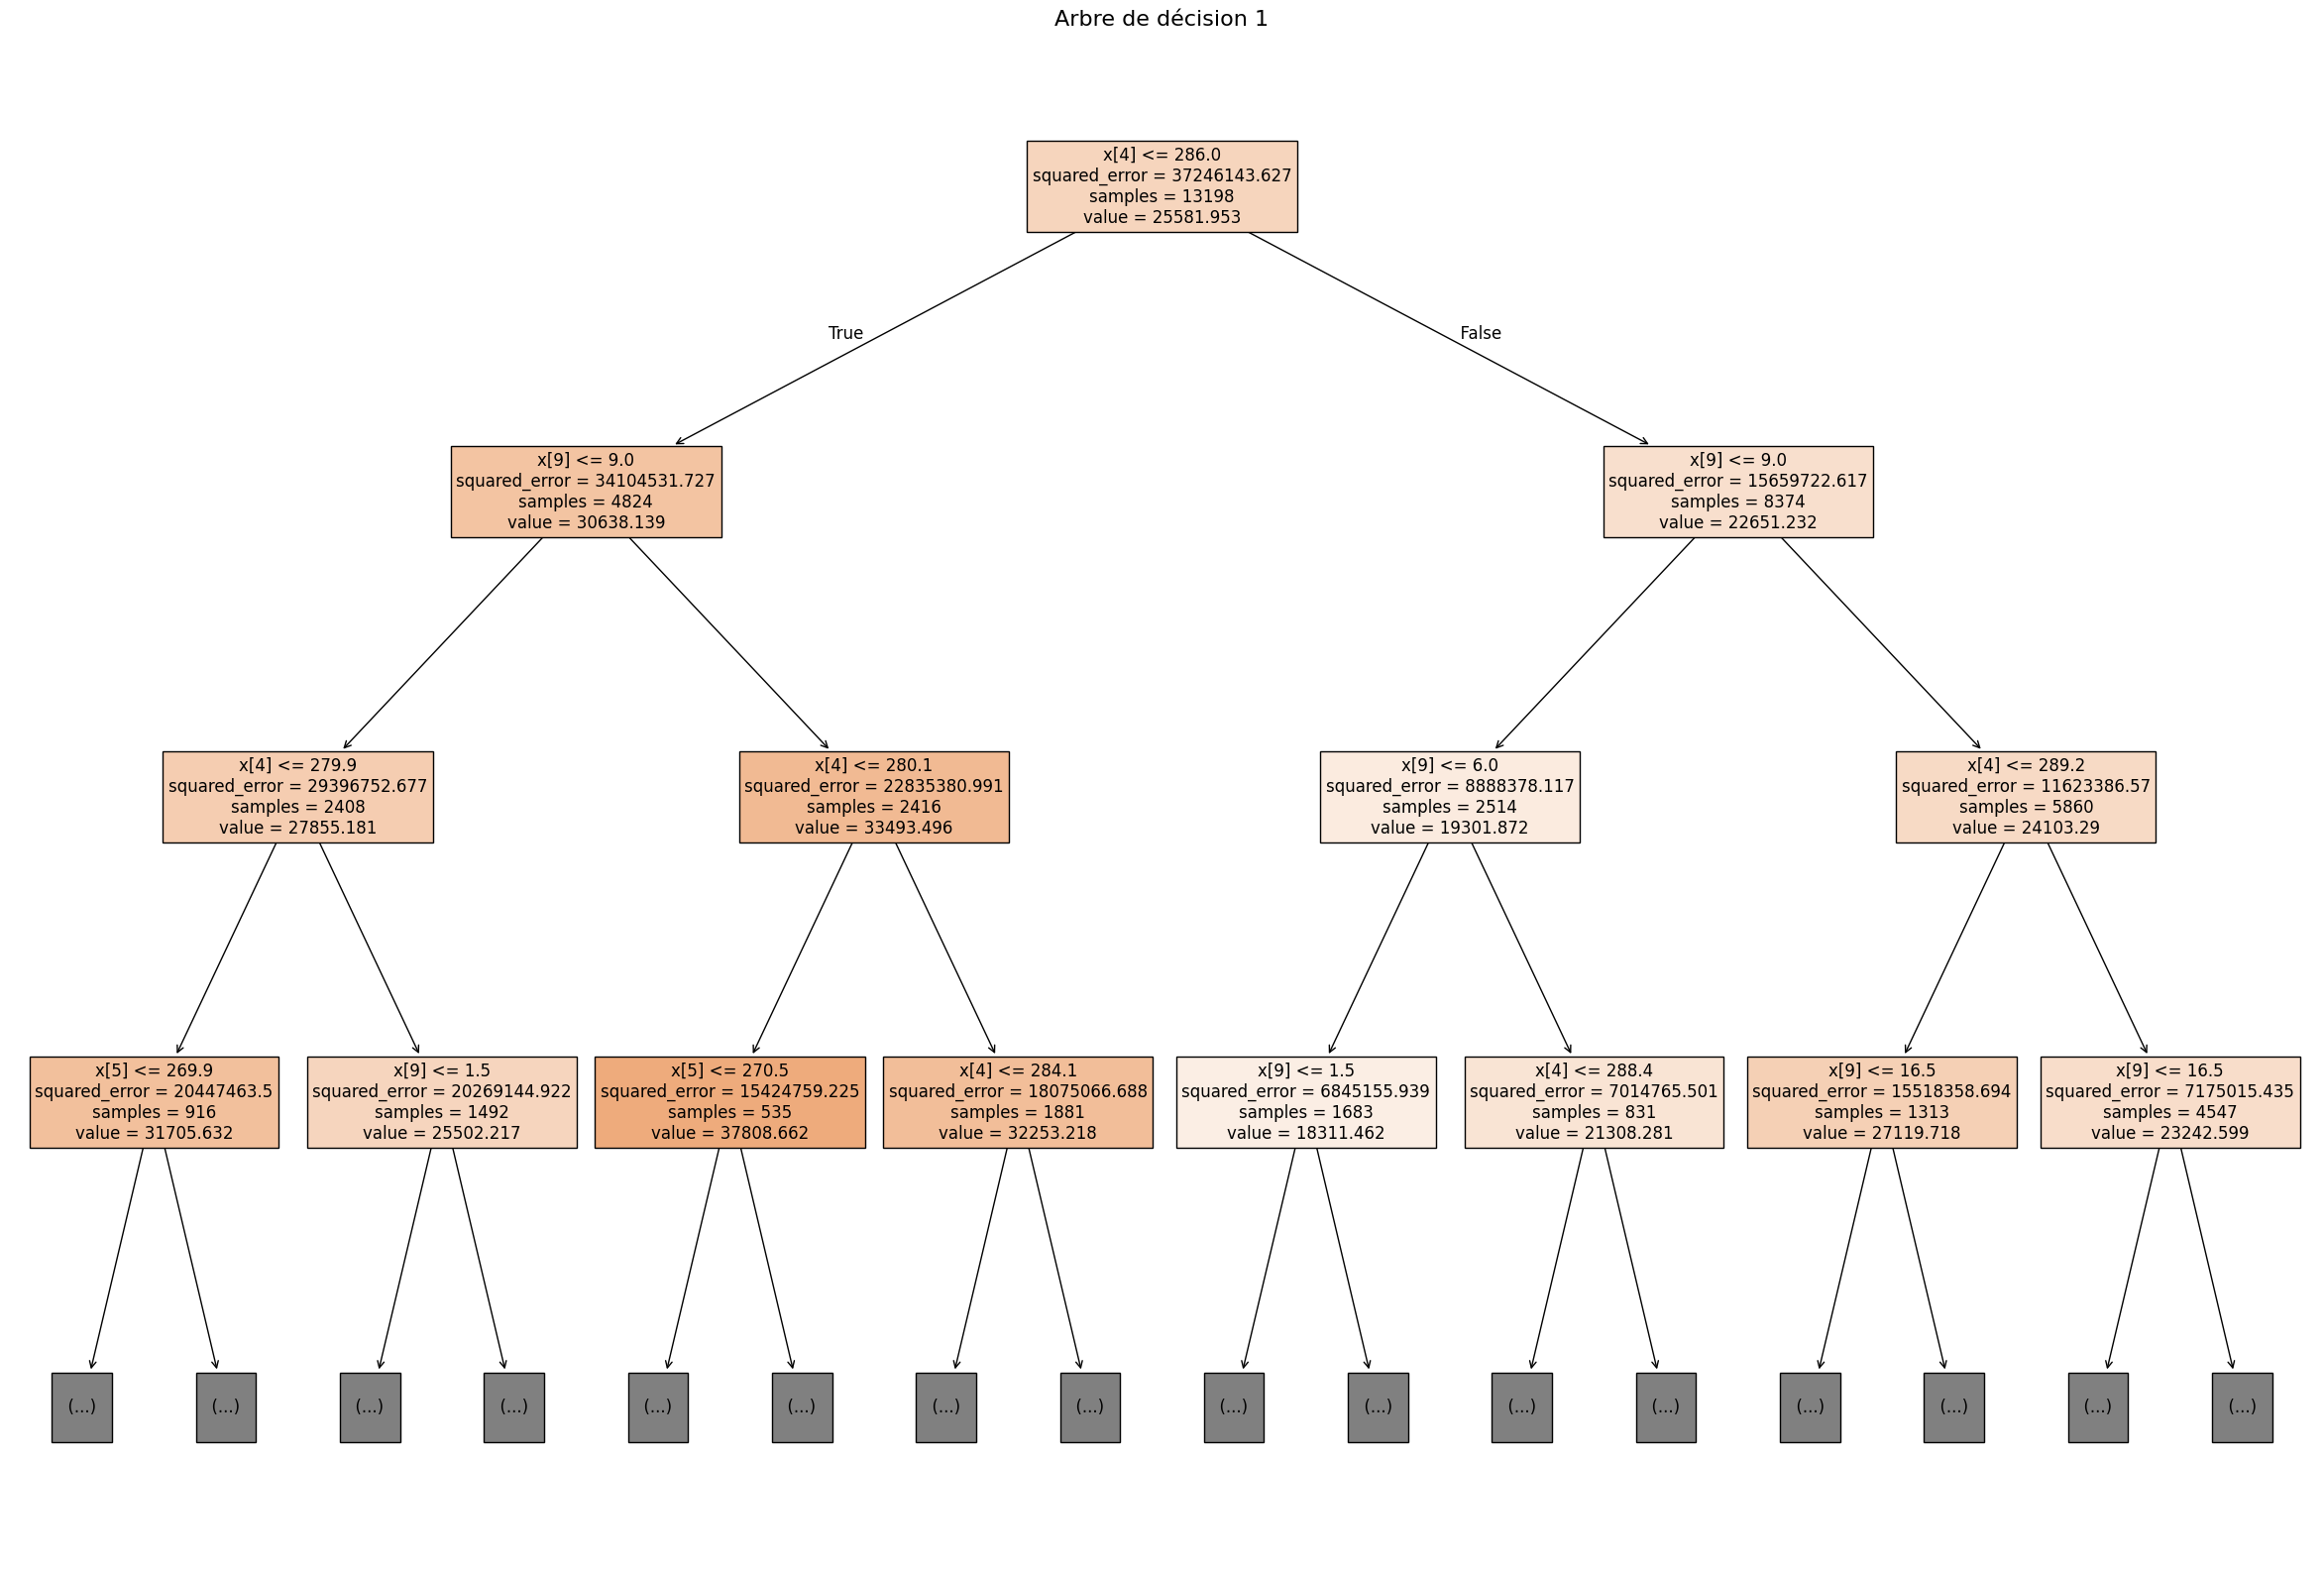

In [30]:
plt.figure(figsize=(30, 20))  
plot_tree(model.estimators_[0],
          filled=True,
          
          max_depth=3,   
          fontsize=12    
         )

plt.title("Arbre de décision 1", fontsize=16)
plt.show()



In [26]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")



MAE: 1706.0714
MSE: 4940132.4289
R² Score: 0.8662


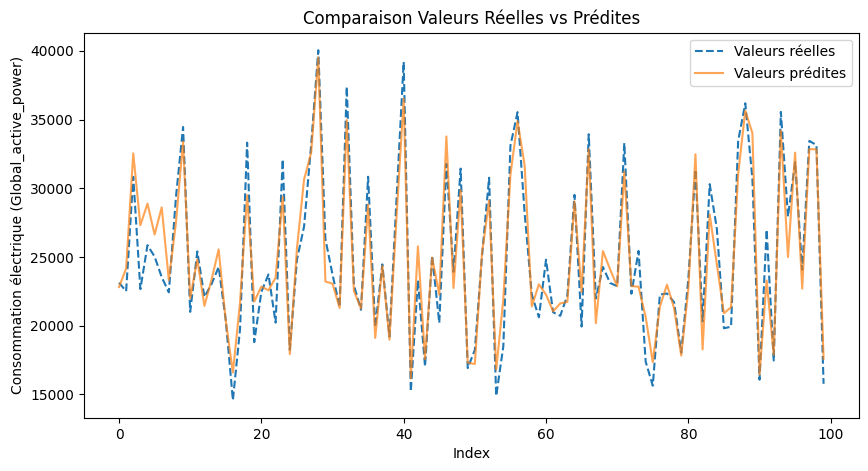

In [27]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Valeurs réelles', linestyle='--')
plt.plot(y_pred[:100], label='Valeurs prédites', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Consommation électrique (Global_active_power)')
plt.title('Comparaison Valeurs Réelles vs Prédites')
plt.legend()
plt.show()


In [29]:
new_data = pd.read_csv("new_data1.csv")

for col in features:
    if col not in new_data.columns:
        new_data[col] = 0

X_new = new_data[features]
predictions = model.predict(X_new)

print(" Prédictions détaillées :")
for i, value in enumerate(predictions, 1):
    print(f"Prédiction consommation pour la ligne {i} : {value:.6f} kW")



 Prédictions détaillées :
Prédiction consommation pour la ligne 1 : 32907.980000 kW
Prédiction consommation pour la ligne 2 : 32511.470000 kW
